###Libraries

In [230]:
# Required Libraries for modelling, plotting results and for accuracy scores and other accuracy measuring scores.
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import numpy.random as nr
import sys
import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection as fs
import seaborn as sns
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier 
from plotly import express as px, graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
# importing necessary libraries from sklearn import linear_model 
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

###Data Read


In [231]:
#Read the dataset from csv file obtained from a known platform kaggle - curated by candian government. 
dataset = pd.read_csv('CO2 Emissions_dataset.csv')

In [232]:
#check the read dataset
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),classify
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,2


###Data Cleaning 

In [233]:
#check if dataset has null values
dataset.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
classify                            0
dtype: int64

In [234]:
#check if dataset has any duplicate values
dataset.duplicated().sum()

1103

In [235]:
#Rename the required column 
dataset.rename(columns={'CO2 Emissions(g/km)':'CO2_emission'}, inplace=True)

In [236]:
#Putting different transmission sub-catagories into their respective catagories for handling non categorical parameters effectively. 
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic of Selective type',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automated Manual',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'CVT',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['M5','M6','M7']),'Manual',dataset['Transmission'])

In [237]:
# Renaming fuel types for better understanding 
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='X','Regular gasoline',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='Z','Premium gasoline',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='E','Ethanol',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='D','Diesel',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='N','Natural gas',dataset['Fuel Type'])

In [238]:
#declare the misisng values to be checked
missing_values = ["n/a", "na", "--","NA","NAN","N/A"]

In [239]:
#check the missing values 
pd.read_csv("CO2 Emissions_dataset.csv", na_values = missing_values)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),classify
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,2
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,2
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2


In [240]:
#drop duplicates 
dataset.drop_duplicates()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission,classify
0,ACURA,ILX,COMPACT,2.0,4,Automatic of Selective type,Premium gasoline,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Premium gasoline,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.1,8.7,10.6,27,244,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic of Selective type,Premium gasoline,10.7,7.7,9.4,30,219,2
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Automatic of Selective type,Premium gasoline,11.2,8.3,9.9,29,232,2
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Automatic of Selective type,Premium gasoline,11.7,8.6,10.3,27,240,2
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic of Selective type,Premium gasoline,11.2,8.3,9.9,29,232,2


In [241]:
#check if any duplicates 
dataset.duplicated().sum()

1112

###Feature Engineering 

In [242]:
#check the unique values of the non numerical data entries
print(dataset['Make'].value_counts())
print(dataset['Model'].value_counts())
print(dataset['Vehicle Class'].value_counts())
print(dataset['Transmission'].value_counts())
print(dataset['Fuel Type'].value_counts())

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64
F-150 FFV 4X4           32
F-150 FFV               32
MUSTANG                 27
FOCUS FFV   

In [243]:
#0 1 2 - encoding of all the columns - rather than adding columns 
make_freq = dataset['Make'].value_counts().to_dict()
model_freq = dataset['Model'].value_counts().to_dict()
vehclass_freq = dataset['Vehicle Class'].value_counts().to_dict()
fuel_freq = dataset['Fuel Type'].value_counts().to_dict()
trans_freq = dataset['Transmission'].value_counts().to_dict()
dataset['Make'] = dataset['Make'].map(make_freq)
dataset['Model'] = dataset['Model'].map(model_freq)
dataset['Vehicle Class'] = dataset['Vehicle Class'].map(vehclass_freq)
dataset['Fuel Type'] = dataset['Fuel Type'].map(fuel_freq)
dataset['Transmission'] = dataset['Transmission'].map(trans_freq)

In [244]:
#fueld = pd.get_dummies(dataset['Fuel Type'], prefix='Fuel', drop_first=True)
#tranmissiond = pd.get_dummies(dataset["Transmission"], drop_first=True)

In [245]:
#datad = [dataset, fueld, tranmissiond]
#dataset = pd.concat(datad)
#dataset = dataset.fillna(0)
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission,classify
0,72,9,1022,2.0,4,3127,3202,9.9,6.7,8.5,33,196,1
1,72,9,1022,2.4,4,1185,3202,11.2,7.7,9.6,29,221,2
2,72,2,1022,1.5,4,576,3202,6.0,5.8,5.9,48,136,1
3,72,1,1217,3.5,6,3127,3202,12.7,9.1,11.1,25,255,2
4,72,7,1217,3.5,6,3127,3202,12.1,8.7,10.6,27,244,2


In [246]:
#make_freq = dataset['Make'].value_counts().to_dict()
#model_freq = dataset['Model'].value_counts().to_dict()
#ehclass_freq = dataset['Vehicle Class'].value_counts().to_dict()
#dataset['Make'] = dataset['Make'].map(make_freq)
#dataset['Model'] = dataset['Model'].map(model_freq)
#dataset['Vehicle Class'] = dataset['Vehicle Class'].map(vehclass_freq)
#dataset.drop(['Fuel Type'], inplace=True, axis=1)
#dataset.drop(['Transmission'], inplace=True, axis=1)
#dataset.head()

In [247]:
dataset.shape

(7385, 13)

In [248]:
dataset.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2_emission', 'classify '],
      dtype='object')

In [249]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int64  
 1   Model                             7385 non-null   int64  
 2   Vehicle Class                     7385 non-null   int64  
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   int64  
 6   Fuel Type                         7385 non-null   int64  
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2_emission                      7385 non-null   int64  
 12  classi

### Split Data and Scale

In [250]:
X = dataset.drop(['CO2_emission', 'classify '], axis = 1)
X.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,72,9,1022,2.0,4,3127,3202,9.9,6.7,8.5,33
1,72,9,1022,2.4,4,1185,3202,11.2,7.7,9.6,29
2,72,2,1022,1.5,4,576,3202,6.0,5.8,5.9,48
3,72,1,1217,3.5,6,3127,3202,12.7,9.1,11.1,25
4,72,7,1217,3.5,6,3127,3202,12.1,8.7,10.6,27


In [251]:
y = dataset['CO2_emission']
yc = dataset['classify ']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state =0)
X_train, X_test, Yc_train, Yc_test = train_test_split(X, yc, test_size=0.2, random_state =0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,72,9,1022,2.0,4,3127,3202,9.9,6.7,8.5,33
1,72,9,1022,2.4,4,1185,3202,11.2,7.7,9.6,29
2,72,2,1022,1.5,4,576,3202,6.0,5.8,5.9,48
3,72,1,1217,3.5,6,3127,3202,12.7,9.1,11.1,25
4,72,7,1217,3.5,6,3127,3202,12.1,8.7,10.6,27



###Single Variable Linear Regression

#####Engine size vs CO2 Emission
Coefficients:  [[36.72767594]]
Intercept:  [134.54328591]
Mean absolute error: 23.41
Residual sum of squares (MSE): 944.78
R2-score: 0.63

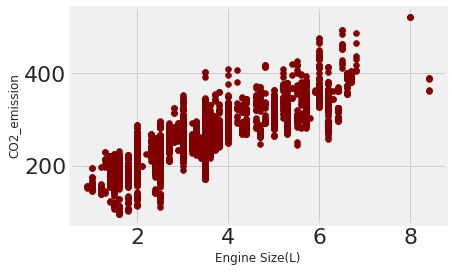

In [252]:
# importing necessary libraries from sklearn import linear_model 
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error 
from sklearn.model_selection import train_test_split# features into variables engine= df[['ENGINESIZE']] 
co2 = dataset[['CO2_emission']]
engine= dataset[['Engine Size(L)']]
# splitting the dataset

engine_treino, engine_test, co2_treino, co2_test = train_test_split(engine, co2, test_size=0.2, random_state=42)

# correlation between features on train dataset

plt.scatter(engine_treino, co2_treino, color='maroon')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2_emission')
plt.show()
msk = np.random.rand(len(dataset)) < 0.8
train = dataset[msk]
test = dataset[~msk]

Coefficients: 36.77
Intercept: 134.56
Mean absolute error: 23.51
Residual sum of squares (MSE): 938.50
R2-score: 0.62


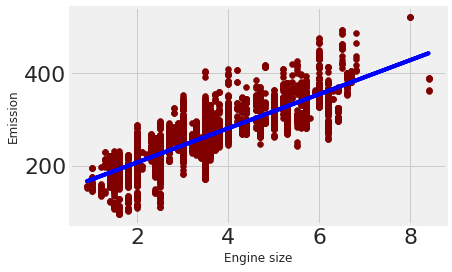

In [253]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine Size(L)']])
train_y = np.asanyarray(train[['CO2_emission']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: %.2f'% regr.coef_)
print ('Intercept: %.2f'%regr.intercept_)
co2 = dataset[['CO2_emission']]
engine= dataset[['Engine Size(L)']]
# splitting the dataset

# correlation between features on train dataset

plt.scatter(engine, co2, color='maroon')

#plt.scatter(train.engine_size, train.CO2_Emission, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x = np.asanyarray(test[['Engine Size(L)']])
test_y = np.asanyarray(test[['CO2_emission']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

#####Cylinders Vs CO2 emission 
Coefficients:  [[26.75167789]]
Intercept:  [100.57338865]
Mean absolute error: 24.35
Residual sum of squares (MSE): 1016.11
R2-score: 0.61

Coefficients: 26.48
Intercept: 102.14
Mean absolute error: 24.57
Residual sum of squares (MSE): 1037.01
R2-score: 0.54


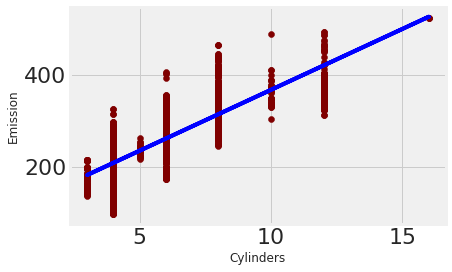

In [254]:
train_x = np.asanyarray(train[['Cylinders']])
train_y = np.asanyarray(train[['CO2_emission']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: %.2f'% regr.coef_)
print ('Intercept: %.2f'%regr.intercept_)
co2 = dataset[['CO2_emission']]
cylinder= dataset[['Cylinders']]
# splitting the dataset

# correlation between features on train dataset

plt.scatter(cylinder, co2, color='maroon')

#plt.scatter(train.engine_size, train.CO2_Emission, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
test_x = np.asanyarray(test[['Cylinders']])
test_y = np.asanyarray(test[['CO2_emission']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

#####Fuel Type vs. CO2 Emission 

Coefficients: -0.01
Intercept: 276.84
Mean absolute error: 45.81
Residual sum of squares (MSE): 3383.41
R2-score: -64.37


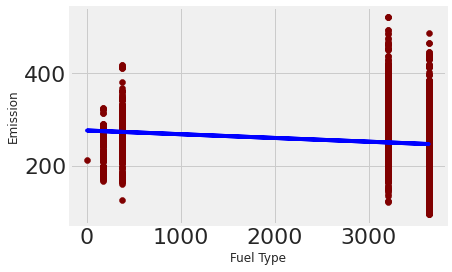

In [255]:
train_x = np.asanyarray(train[['Fuel Type']])
train_y = np.asanyarray(train[['CO2_emission']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: %.2f'% regr.coef_)
print ('Intercept: %.2f'%regr.intercept_)
co2 = dataset[['CO2_emission']]
cylinder= dataset[['Fuel Type']]
# splitting the dataset

# correlation between features on train dataset
plt.scatter(cylinder, co2, color='maroon')
#plt.scatter(train.engine_size, train.CO2_Emission, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'blue')
plt.xlabel("Fuel Type")
plt.ylabel("Emission")
test_x = np.asanyarray(test[['Fuel Type']])
test_y = np.asanyarray(test[['CO2_emission']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

#####Fuel Consumption City (L/100 km) VS CO2Emissions(g/km)
Coefficients:  [[15.39762143]]
Intercept:  [57.29906769]
Mean absolute error: 14.69
Residual sum of squares (MSE): 563.04
R2-score: 0.81

Coefficients: 15.54
Intercept: 55.77
Mean absolute error: 14.43
Residual sum of squares (MSE): 598.02
R2-score: 0.81


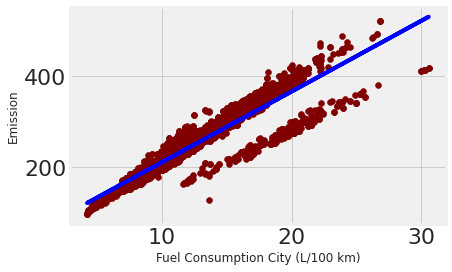

In [256]:
train_x = np.asanyarray(train[['Fuel Consumption City (L/100 km)']])
train_y = np.asanyarray(train[['CO2_emission']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: %.2f'% regr.coef_)
print ('Intercept: %.2f'%regr.intercept_)
co2 = dataset[['CO2_emission']]
fuelcty= dataset[['Fuel Consumption City (L/100 km)']]
# splitting the dataset

# correlation between features on train dataset

plt.scatter(fuelcty, co2, color='maroon')

#plt.scatter(train.engine_size, train.CO2_Emission, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'blue')
plt.xlabel("Fuel Consumption City (L/100 km)")
plt.ylabel("Emission")
test_x = np.asanyarray(test[['Fuel Consumption City (L/100 km)']])
test_y = np.asanyarray(test[['CO2_emission']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

#####Fuel Consumption Hwy (L/100 km) VS CO2 Emissions(g/km)

Coefficients:  [[23.24703636]]
Intercept:  [40.40326451]
Mean absolute error: 18.65
Residual sum of squares (MSE): 788.00
R2-score: 0.71

Coefficients: 23.47
Intercept: 38.67
Mean absolute error: 19.08
Residual sum of squares (MSE): 834.76
R2-score: 0.71


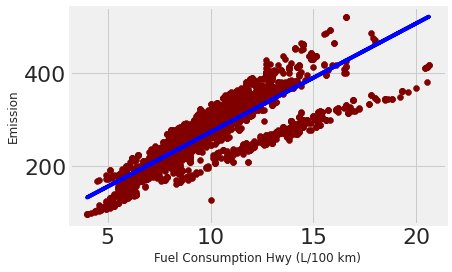

In [257]:
train_x = np.asanyarray(train[['Fuel Consumption Hwy (L/100 km)']])
train_y = np.asanyarray(train[['CO2_emission']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: %.2f'% regr.coef_)
print ('Intercept: %.2f'%regr.intercept_)
co2 = dataset[['CO2_emission']]
fuelhwy= dataset[['Fuel Consumption Hwy (L/100 km)']]
# splitting the dataset

# correlation between features on train dataset

plt.scatter(fuelhwy, co2, color='maroon')

#plt.scatter(train.engine_size, train.CO2_Emission, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'blue')
plt.xlabel("Fuel Consumption Hwy (L/100 km)")
plt.ylabel("Emission")
test_x = np.asanyarray(test[['Fuel Consumption Hwy (L/100 km)']])
test_y = np.asanyarray(test[['CO2_emission']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

#####Fuel Consumption Comb (L/100 km) Vs CO2 Emissions(g/km) 
Coefficients:  [[18.59172357]]
Intercept:  [46.58311102]
Mean absolute error: 14.42
Residual sum of squares (MSE): 570.94
R2-score: 0.81

Coefficients: 18.78
Intercept: 44.85
Mean absolute error: 14.32
Residual sum of squares (MSE): 618.67
R2-score: 0.80


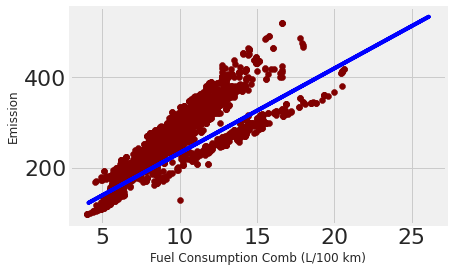

In [258]:
train_x = np.asanyarray(train[['Fuel Consumption Comb (L/100 km)']])
train_y = np.asanyarray(train[['CO2_emission']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: %.2f'% regr.coef_)
print ('Intercept: %.2f'%regr.intercept_)
co2 = dataset[['CO2_emission']]
fuelcom= dataset[['Fuel Consumption Comb (L/100 km)']]
# splitting the dataset

# correlation between features on train dataset

plt.scatter(fuelhwy, co2, color='maroon')

#plt.scatter(train.engine_size, train.CO2_Emission, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'blue')
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("Emission")
test_x = np.asanyarray(test[['Fuel Consumption Comb (L/100 km)']])
test_y = np.asanyarray(test[['CO2_emission']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

#####Fuel Consumption Comb (mpg) Vs CO2 Emissions(g/km)
Coefficients:  [[-7.30919248]]
Intercept:  [451.4641556]
Mean absolute error: 16.86
Residual sum of squares (MSE): 652.94
R2-score: 0.76


Coefficients: -7.43
Intercept: 454.97
Mean absolute error: 17.07
Residual sum of squares (MSE): 675.40
R2-score: 0.78


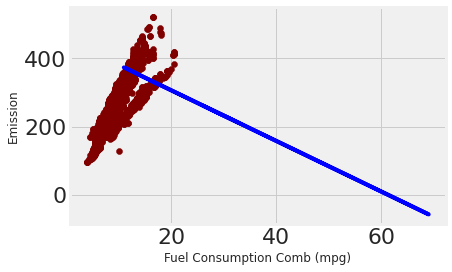

In [259]:
train_x = np.asanyarray(train[['Fuel Consumption Comb (mpg)']])
train_y = np.asanyarray(train[['CO2_emission']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: %.2f'% regr.coef_)
print ('Intercept: %.2f'%regr.intercept_)
co2 = dataset[['CO2_emission']]
fuelcom= dataset[['Fuel Consumption Comb (mpg)']]
# splitting the dataset

# correlation between features on train dataset

plt.scatter(fuelhwy, co2, color='maroon')

#plt.scatter(train.engine_size, train.CO2_Emission, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'blue')
plt.xlabel("Fuel Consumption Comb (mpg)")
plt.ylabel("Emission")
test_x = np.asanyarray(test[['Fuel Consumption Comb (mpg)']])
test_y = np.asanyarray(test[['CO2_emission']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

###Multivariable Linear Regression


####Feature Importance

Make
Feature: 0, Score: -0.00
Model
Feature: 1, Score: -0.57
Vehicle Class
Feature: 2, Score: -0.00
Engine Size(L)
Feature: 3, Score: 3.14
Cylinders
Feature: 4, Score: 5.74
Transmission
Feature: 5, Score: 0.00
Fuel Type
Feature: 6, Score: 0.01
Fuel Consumption City (L/100 km)
Feature: 7, Score: 0.87
Fuel Consumption Hwy (L/100 km)
Feature: 8, Score: 2.29
Fuel Consumption Comb (L/100 km)
Feature: 9, Score: 6.84
Fuel Consumption Comb (mpg)
Feature: 10, Score: -2.56


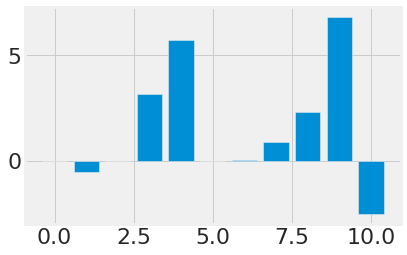

In [260]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
  print(X.columns[i])
  print('Feature: %0d, Score: %.2f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

####Model 

######Engine Size(L),Fuel Consumption Comb (mpg), Cylinders, CO2_emission,Fuel Type, Transmission, Fuel Consumption Comb (L/100 km), Fuel Consumption Hwy (L/100 km),Fuel Consumption City (L/100 km)
R2 score : 0.912

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


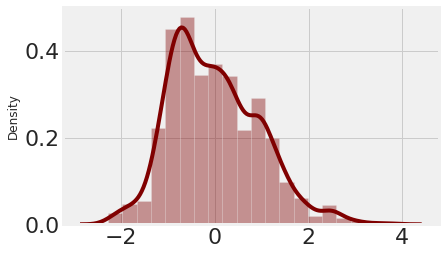

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


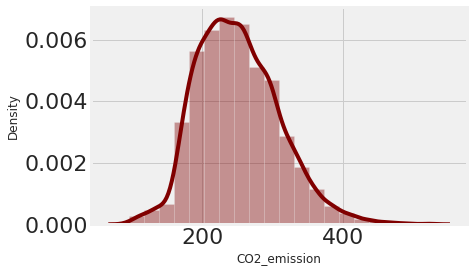

Coefficients:  [[ 0.05231875  0.19056663  0.20100088  0.04068387  0.95580817 -0.05288873
  -0.11341685]]
Intercept: -0.00
------------------------------------------------
R2 Score for test dataset : 0.91
R2 Score for training data to observe : 0.91
------------------------------------------------
RMSE for test dataset : 0.29
RMSE for training data to observe : 0.29


In [261]:
dataset_scale = dataset[['Engine Size(L)','Fuel Consumption Comb (mpg)',
                         'Cylinders', 'CO2_emission','Fuel Type', 'Transmission'
                         ,'Fuel Consumption Comb (L/100 km)',
                         'Fuel Consumption Hwy (L/100 km)',
                         'Fuel Consumption City (L/100 km)'
                         ]]
dataset_scale = pd.DataFrame(scaler.fit_transform(dataset_scale), columns = dataset_scale.columns)

X_feature5 =  dataset_scale[['Engine Size(L)',
                         'Cylinders', 'Fuel Type',
                         'Transmission',
                         'Fuel Consumption Comb (L/100 km)',
                         'Fuel Consumption Hwy (L/100 km)',
                         'Fuel Consumption City (L/100 km)'
                         ]]
CO2_Emission = dataset_scale[['CO2_emission']]

# splitting the dataset

X_trainm5, X_testm5, Y_trainm5, Y_testm5 = train_test_split(X_feature5, CO2_Emission, test_size = 0.33, random_state=1)
linerreg = LinearRegression().fit(X_trainm5, Y_trainm5)

y_pred = linerreg.predict(X_testm5)
#print("y_predicted",y_pred);
#print("y_test",Y_test);
lr = LinearRegression().fit(X_trainm5, Y_trainm5)
y_predt = linerreg.predict(X_trainm5)
lr_scoret = r2_score(Y_trainm5, y_predt)
lr_score = r2_score(Y_testm5, y_pred)
lr_rmse = mean_squared_error(Y_testm5, y_pred, squared = False)
lr_rmset = mean_squared_error(Y_trainm5, y_predt, squared = False)
sns.distplot(y_pred, bins=20,color='maroon')
plt.show()
sns.distplot(dataset['CO2_emission'], bins=20, color='maroon')
plt.show()
print("Coefficients: ", lr.coef_)
print("Intercept: %.2f"% lr.intercept_)
print("------------------------------------------------")
print("R2 Score for test dataset : %.2f"% lr_score)
print("R2 Score for training data to observe : %.2f"% lr_scoret)
print("------------------------------------------------")
print("RMSE for test dataset : %.2f"% lr_rmse)
print("RMSE for training data to observe : %.2f"% lr_rmse)

######Fuel consumption city, fuel consumption hwy, fuel consumption comb 
R2 score 0.85

In [262]:
scaler = MinMaxScaler()
#high correlation Fuel Consumption Hwy (L/100 km) to CO2 Emission

dataset_scale = dataset[['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)',
                         'Fuel Consumption Comb (L/100 km)', 'CO2_emission']]
dataset_scale = pd.DataFrame(scaler.fit_transform(dataset_scale), columns = dataset_scale.columns)

X_feature1 =  dataset_scale[['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)',
                         'Fuel Consumption Comb (L/100 km)']]
CO2_Emission = dataset_scale[['CO2_emission']]

# splitting the dataset

X_trainm1, X_testm1, Y_trainm1, Y_testm1= train_test_split(X_feature1, CO2_Emission, test_size = 0.33, random_state=1)

# correlation between features on train dataset
X_trainm1.shape 


(4947, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


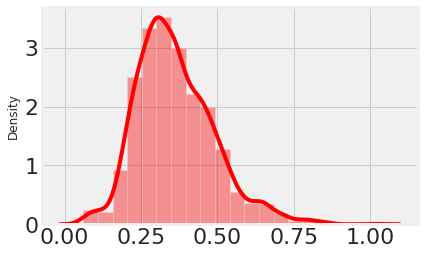

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


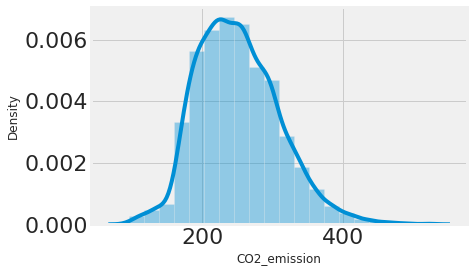

Coefficients:  [[ 0.17913498 -0.19379232  0.97319925]]
Intercept: 0.06
------------------------------------------------
R2 Score for test dataset : 0.85
R2 Score for training data to observe : 0.85
------------------------------------------------
RMSE for test dataset : 0.05
RMSE for training data to observe : 0.05


In [263]:
lr = LinearRegression().fit(X_trainm1, Y_trainm1)
y_pred = lr.predict(X_testm1)
#print("y_predicted",y_pred);
y_predt = lr.predict(X_trainm1)
lr_scoret = r2_score(Y_trainm1, y_predt)
lr_score = r2_score(Y_testm1, y_pred)
lr_rmse = mean_squared_error(Y_testm1, y_pred, squared = False)
lr_rmset = mean_squared_error(Y_trainm1, y_predt, squared = False)
sns.distplot(y_pred, bins=20,color='red')
plt.show()
sns.distplot(dataset['CO2_emission'], bins=20)
plt.show()
print("Coefficients: ", lr.coef_)
print("Intercept: %.2f"% lr.intercept_)
print("------------------------------------------------")
print("R2 Score for test dataset : %.2f"% lr_score)
print("R2 Score for training data to observe : %.2f"% lr_scoret)
print("------------------------------------------------")
print("RMSE for test dataset : %.2f"% lr_rmse)
print("RMSE for training data to observe : %.2f"% lr_rmse)

#####Engine Size(L), Fuel Consumption Hwy (L/100 km), Cylinders, CO2 Emissions(g/km)
R2 Score for test dataset :  0.8627936793139621.
R2 Score for training data to observe :  0.8686224526753902
RMSE for test dataset :  0.0506273757994802
RMSE for training data to observe :  0.0506273757994802

In [264]:
scaler = MinMaxScaler()
#high correlation Fuel Consumption Hwy (L/100 km) to CO2 Emission

dataset_scale = dataset[['Engine Size(L)','Fuel Consumption Hwy (L/100 km)',
                         'Cylinders', 'CO2_emission']]
dataset_scale = pd.DataFrame(scaler.fit_transform(dataset_scale), columns = dataset_scale.columns)

X_feature2 =  dataset_scale[['Engine Size(L)','Fuel Consumption Hwy (L/100 km)',
                         'Cylinders']]
CO2_Emission = dataset_scale[['CO2_emission']]

# splitting the dataset

X_trainm2, X_testm2, Y_trainm2, Y_testm2 = train_test_split(X_feature2, CO2_Emission, test_size = 0.33, random_state=1)

# correlation between features on train dataset
X_train.shape 


(5908, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


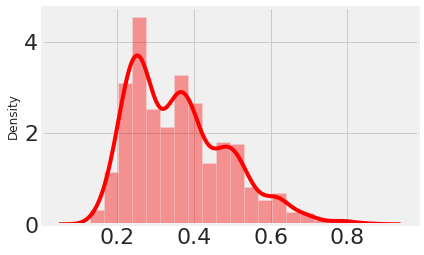

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


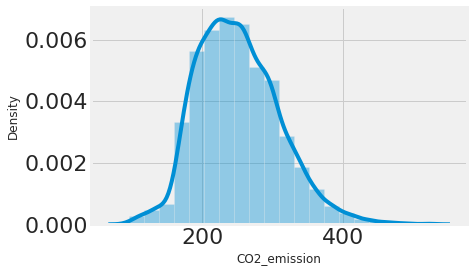

Coefficients:  [[0.11991282 0.57231406 0.28272036]]
Intercept: 0.10
------------------------------------------------
R2 Score for test dataset : 0.86
R2 Score for training data to observe : 0.87
------------------------------------------------
RMSE for test dataset : 0.05
RMSE for training data to observe : 0.05


In [265]:
lr = LinearRegression().fit(X_trainm2, Y_trainm2)
y_pred = lr.predict(X_testm2)
#print("y_predicted",y_pred);
y_predt = lr.predict(X_trainm2)
lr_scoret = r2_score(Y_trainm2, y_predt)
lr_score = r2_score(Y_testm2, y_pred)
lr_rmse = mean_squared_error(Y_testm2, y_pred, squared = False)
lr_rmset = mean_squared_error(Y_trainm2, y_predt, squared = False)
sns.distplot(y_pred, bins=20,color='red')
plt.show()
sns.distplot(dataset['CO2_emission'], bins=20)
plt.show()
print("Coefficients: ", lr.coef_)
print("Intercept: %.2f"% lr.intercept_)
print("------------------------------------------------")
print("R2 Score for test dataset : %.2f"% lr_score)
print("R2 Score for training data to observe : %.2f"% lr_scoret)
print("------------------------------------------------")
print("RMSE for test dataset : %.2f"% lr_rmse)
print("RMSE for training data to observe : %.2f"% lr_rmse)

#####Engine Size(L), Fuel Consumption Comb (L/100 km), Cylinders, CO2 Emissions(g/km)
R2 Score for test dataset :  0.878563586733978
R2 Score for training data to observe :  0.8794855860851092
RMSE for test dataset :  0.04762914915912338
RMSE for training data to observe :  0.04762914915912338

In [266]:
dataset_scale = dataset[['Engine Size(L)','Fuel Consumption Comb (L/100 km)',
                         'Cylinders', 'CO2_emission']]
dataset_scale = pd.DataFrame(scaler.fit_transform(dataset_scale), columns = dataset_scale.columns)

X_feature3 =  dataset_scale[['Engine Size(L)','Fuel Consumption Comb (L/100 km)',
                         'Cylinders']]
CO2_Emission = dataset_scale[['CO2_emission']]

# splitting the dataset

X_trainm3, X_testm3, Y_trainm3, Y_testm3= train_test_split(X_feature3, CO2_Emission, test_size = 0.33, random_state=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


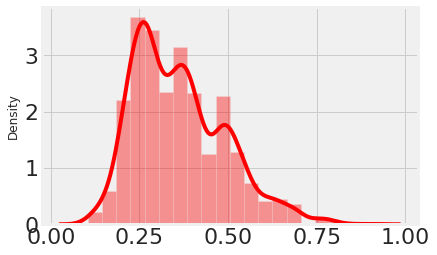

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


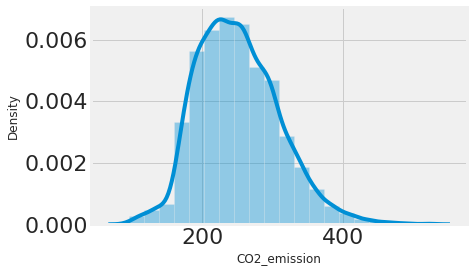

Coefficients:  [[0.11991282 0.57231406 0.28272036]]
Intercept: 0.10
------------------------------------------------
R2 Score for test dataset : 0.88
R2 Score for training data to observe : 0.88
------------------------------------------------
RMSE for test dataset : 0.05
RMSE for training data to observe : 0.05


In [267]:
linerreg = LinearRegression().fit(X_trainm3, Y_trainm3)

y_pred = linerreg.predict(X_testm3)
#print("y_predicted",y_pred);
#print("y_test",Y_test);
sns.distplot(y_pred, bins=20,color='red')
plt.show()
sns.distplot(dataset['CO2_emission'], bins=20)
plt.show()
y_predt = linerreg.predict(X_trainm3)
lr_scoret = r2_score(Y_trainm3, y_predt)
lr_score = r2_score(Y_testm3, y_pred)
lr_rmse = mean_squared_error(Y_testm3, y_pred, squared = False)
lr_rmset = mean_squared_error(Y_trainm3, y_predt, squared = False)
print("Coefficients: ", lr.coef_)
print("Intercept: %.2f"% lr.intercept_)
print("------------------------------------------------")
print("R2 Score for test dataset : %.2f"% lr_score)
print("R2 Score for training data to observe : %.2f"% lr_scoret)
print("------------------------------------------------")
print("RMSE for test dataset : %.2f"% lr_rmse)
print("RMSE for training data to observe : %.2f"% lr_rmse)

#####Engine Size(L), Fuel Consumption Comb (mpg), Cylinders, CO2 Emissions(g/km)
R2 Score for test dataset :  0.893649643117298
R2 Score for training data to observe :  0.8940985507942552
RMSE for test dataset :  0.04457258619326664
RMSE for training data to observe :  0.04457258619326664

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


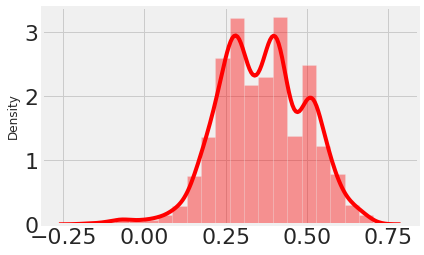

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


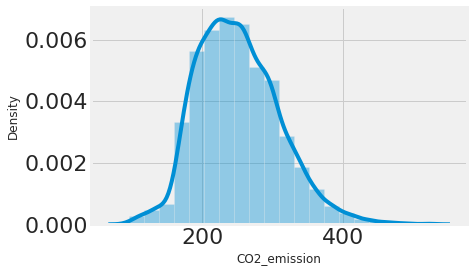

Coefficients:  [[0.11991282 0.57231406 0.28272036]]
Intercept: 0.10
------------------------------------------------
R2 Score for test dataset : 0.89
R2 Score for training data to observe : 0.89
------------------------------------------------
RMSE for test dataset : 0.04
RMSE for training data to observe : 0.04


In [268]:
dataset_scale = dataset[['Engine Size(L)','Fuel Consumption Comb (mpg)',
                         'Cylinders', 'CO2_emission']]
dataset_scale = pd.DataFrame(scaler.fit_transform(dataset_scale), columns = dataset_scale.columns)

X_feature4 =  dataset_scale[['Engine Size(L)','Fuel Consumption Comb (mpg)',
                         'Cylinders']]
CO2_Emission = dataset_scale[['CO2_emission']]

# splitting the dataset

X_trainm4, X_testm4, Y_trainm4, Y_testm4 = train_test_split(X_feature4, CO2_Emission, test_size = 0.33, random_state=1)
linerreg = LinearRegression().fit(X_trainm4, Y_trainm4)

y_pred = linerreg.predict(X_testm4)
#print("y_predicted",y_pred);
#print("y_test",Y_test);

y_predt = linerreg.predict(X_trainm4)
lr_scoret = r2_score(Y_trainm4, y_predt)
lr_score = r2_score(Y_testm4, y_pred)
lr_rmse = mean_squared_error(Y_testm4, y_pred, squared = False)
lr_rmset = mean_squared_error(Y_trainm4, y_predt, squared = False)
sns.distplot(y_pred, bins=20,color='red')
plt.show()
sns.distplot(dataset['CO2_emission'], bins=20)
plt.show()
print("Coefficients: ", lr.coef_)
print("Intercept: %.2f"% lr.intercept_)
print("------------------------------------------------")
print("R2 Score for test dataset : %.2f"% lr_score)
print("R2 Score for training data to observe : %.2f"% lr_scoret)
print("------------------------------------------------")
print("RMSE for test dataset : %.2f"% lr_rmse)
print("RMSE for training data to observe : %.2f"% lr_rmse)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


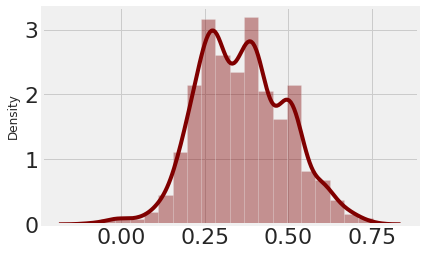

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


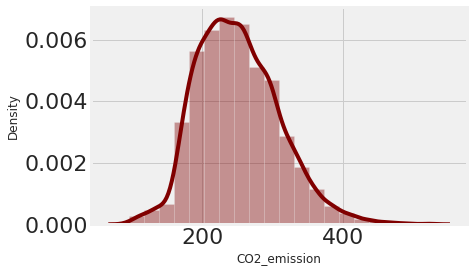

Coefficients:  [[0.11991282 0.57231406 0.28272036]]
Intercept: 0.10
------------------------------------------------
R2 Score for test dataset : 0.90
R2 Score for training data to observe : 0.90
------------------------------------------------
RMSE for test dataset : 0.04
RMSE for training data to observe : 0.04


In [269]:
dataset_scale = dataset[['Engine Size(L)','Fuel Consumption Comb (mpg)',
                         'Cylinders', 'CO2_emission',
                         'Fuel Consumption Comb (L/100 km)',
                         'Fuel Consumption Hwy (L/100 km)',
                         'Fuel Consumption City (L/100 km)'
                         ]]
dataset_scale = pd.DataFrame(scaler.fit_transform(dataset_scale), columns = dataset_scale.columns)

X_feature5 =  dataset_scale[['Engine Size(L)','Fuel Consumption Comb (mpg)',
                         'Cylinders',
                         'Fuel Consumption Comb (L/100 km)',
                         'Fuel Consumption Hwy (L/100 km)',
                         'Fuel Consumption City (L/100 km)'
                         ]]
CO2_Emission = dataset_scale[['CO2_emission']]

# splitting the dataset

X_trainm5, X_testm5, Y_trainm5, Y_testm5 = train_test_split(X_feature5, CO2_Emission, test_size = 0.33, random_state=1)
linerreg = LinearRegression().fit(X_trainm5, Y_trainm5)

y_pred = linerreg.predict(X_testm5)
#print("y_predicted",y_pred);
#print("y_test",Y_test);

y_predt = linerreg.predict(X_trainm5)
lr_scoret = r2_score(Y_trainm5, y_predt)
lr_score = r2_score(Y_testm5, y_pred)
lr_rmse = mean_squared_error(Y_testm5, y_pred, squared = False)
lr_rmset = mean_squared_error(Y_trainm5, y_predt, squared = False)
sns.distplot(y_pred, bins=20,color='maroon')
plt.show()
sns.distplot(dataset['CO2_emission'], bins=20, color='maroon')
plt.show()
print("Coefficients: ", lr.coef_)
print("Intercept: %.2f"% lr.intercept_)
print("------------------------------------------------")
print("R2 Score for test dataset : %.2f"% lr_score)
print("R2 Score for training data to observe : %.2f"% lr_scoret)
print("------------------------------------------------")
print("RMSE for test dataset : %.2f"% lr_rmse)
print("RMSE for training data to observe : %.2f"% lr_rmse)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


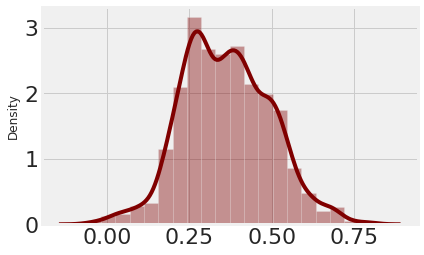

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


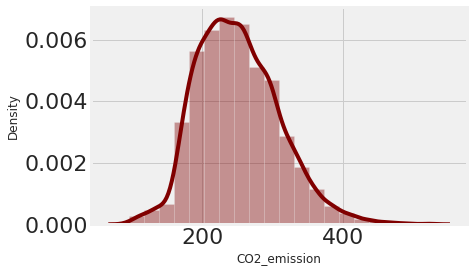

Coefficients:  [[0.11991282 0.57231406 0.28272036]]
Intercept: 0.10
------------------------------------------------
R2 Score for test dataset : 0.93
R2 Score for training data to observe : 0.93
------------------------------------------------
RMSE for test dataset : 0.04
RMSE for training data to observe : 0.04


In [270]:
dataset_scale = dataset[['Engine Size(L)','Fuel Consumption Comb (mpg)',
                         'Cylinders', 'CO2_emission','Fuel Type', 
                         'Fuel Consumption Comb (L/100 km)',
                         'Fuel Consumption Hwy (L/100 km)',
                         'Fuel Consumption City (L/100 km)'
                         ]]
dataset_scale = pd.DataFrame(scaler.fit_transform(dataset_scale), columns = dataset_scale.columns)

X_feature5 =  dataset_scale[['Engine Size(L)','Fuel Consumption Comb (mpg)',
                         'Cylinders', 'Fuel Type',
                         'Fuel Consumption Comb (L/100 km)',
                         'Fuel Consumption Hwy (L/100 km)',
                         'Fuel Consumption City (L/100 km)'
                         ]]
CO2_Emission = dataset_scale[['CO2_emission']]

# splitting the dataset

X_trainm5, X_testm5, Y_trainm5, Y_testm5 = train_test_split(X, CO2_Emission, test_size = 0.33, random_state=1)
linerreg = LinearRegression().fit(X_trainm5, Y_trainm5)

y_pred = linerreg.predict(X_testm5)
#print("y_predicted",y_pred);
#print("y_test",Y_test);

y_predt = linerreg.predict(X_trainm5)
lr_scoret = r2_score(Y_trainm5, y_predt)
lr_score = r2_score(Y_testm5, y_pred)
lr_rmse = mean_squared_error(Y_testm5, y_pred, squared = False)
lr_rmset = mean_squared_error(Y_trainm5, y_predt, squared = False)
sns.distplot(y_pred, bins=20,color='maroon')
plt.show()
sns.distplot(dataset['CO2_emission'], bins=20, color='maroon')
plt.show()
print("Coefficients: ", lr.coef_)
print("Intercept: %.2f"% lr.intercept_)
print("------------------------------------------------")
print("R2 Score for test dataset : %.2f"% lr_score)
print("R2 Score for training data to observe : %.2f"% lr_scoret)
print("------------------------------------------------")
print("RMSE for test dataset : %.2f"% lr_rmse)
print("RMSE for training data to observe : %.2f"% lr_rmse)

###Polynomial Regression

Quadratic Regression 

In [271]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Engine Size(L)']])
train_y = np.asanyarray(train[['CO2_emission']])

test_x = np.asanyarray(test[['Engine Size(L)']])
test_y = np.asanyarray(test[['CO2_emission']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.  , 2.  , 4.  ],
       [1.  , 2.4 , 5.76],
       [1.  , 1.5 , 2.25],
       ...,
       [1.  , 2.  , 4.  ],
       [1.  , 2.  , 4.  ],
       [1.  , 2.  , 4.  ]])

In [272]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         54.16440805 -2.34254349]]
Intercept:  [107.25781292]


Text(0, 0.5, 'CO2 Emission')

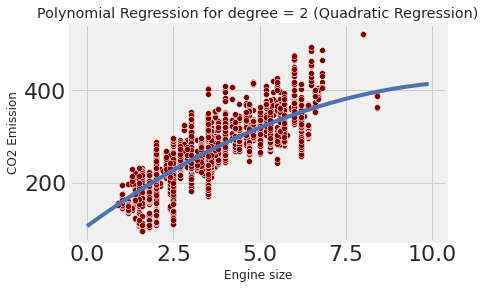

In [273]:
#plt.scatter(train.co2, train.engine , color='blue') 
ax = sns.scatterplot(data=dataset,x='Engine Size(L)', y='CO2_emission',color='maroon')
#plt.scatter(train.Engine Size(L), train.CO2 Emissions(g/km),  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-b' )
plt.title('Polynomial Regression for degree = 2 (Quadratic Regression)')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")

R2 Score for Polynomial Regression degree = 2

In [274]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score 

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.40
Residual sum of squares (MSE): 926.56
R2-score: 0.63


Polynomial Regression with degree = 3

Coefficients:  [[ 0.         77.94502617 -9.11287189  0.57937943]]
Intercept:  [82.60601494]


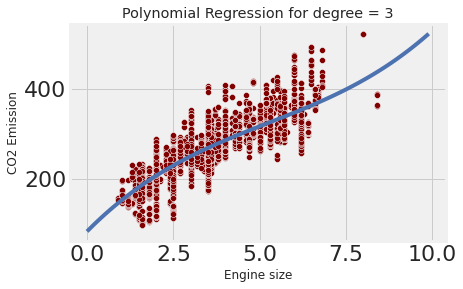

In [275]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
#plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')

ax = sns.scatterplot(data=dataset,x='Engine Size(L)', y='CO2_emission',color='maroon')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-b' )
plt.title('Polynomial Regression for degree = 3')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)

R2 Score for degree = 3

In [276]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )

Mean absolute error: 23.28
Residual sum of squares (MSE): 924.85
R2-score: 0.64


###Decision Tree regression

#####for the important 2 variables

In [277]:
# Importing the dataset
Xf1 = dataset.iloc[:, 7:8].values
yf1 = dataset.iloc[:, 11].values
# Splitting the dataset into the Training set and Test set
X_trainf1,X_testf1, y_trainf1, y_testf1 = train_test_split(Xf1, yf1, test_size=0.2, random_state=42)
regressor = DecisionTreeRegressor()
regressor.fit(X_trainf1.reshape(-1,1), y_trainf1.reshape(-1,1))

DecisionTreeRegressor()

In [278]:
y_pred = regressor.predict(X_testf1.reshape(-1,1))
df = pd.DataFrame({'Real Values ':y_testf1.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,253,249.687500
1,344,325.393939
2,322,319.117647
3,297,292.325000
4,308,290.537037
...,...,...
1472,221,222.621622
1473,260,257.880000
1474,184,184.113208
1475,235,241.275510


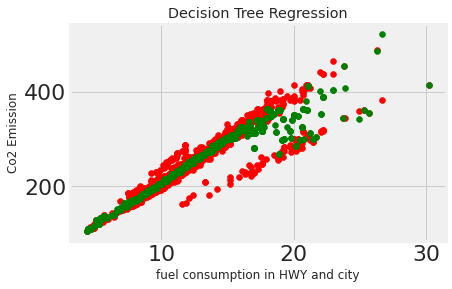

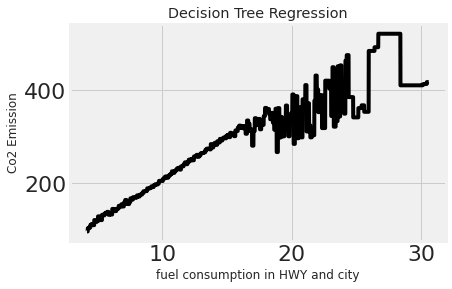

In [279]:
# Visualising the Decision Tree Regression Results 
X_grid = np.arange(min(Xf1), max(Xf1), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_testf1, y_testf1, color = 'red')
plt.scatter(X_testf1, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('fuel consumption in HWY and city')
plt.ylabel('Co2 Emission')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('fuel consumption in HWY and city')
plt.ylabel('Co2 Emission')
plt.show()

In [280]:
features = ['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']
target = ['CO2_emission']
Xf2 = dataset[features]
yf2 = dataset[target]

In [281]:
x_trainf2, x_testf2, y_trainf2, y_testf2 = train_test_split(Xf2, yf2, test_size=0.65, random_state=0)

In [282]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(x_trainf2, y_trainf2)

DecisionTreeRegressor(random_state=0)

In [283]:
model.score(x_trainf2, y_trainf2)

0.9906682209690917

In [284]:
model.score(x_testf2, y_testf2)

0.9066901067606108

In [285]:
#from sklearn import tree
#tree.plot_tree(model, filled=True, feature_names=X.columns)

#####Decision Tree regresion - For all Feature variables


In [286]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, Y_train)
dsreg = model.predict(X_test)

print("Mean Squared Error",round(np.sqrt(mean_squared_error(Y_test,dsreg)),2))
print("R2 Score",round(r2_score(Y_test, dsreg),4))

Mean Squared Error 3.65
R2 Score 0.9961


In [287]:
# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Fuel Consumption Comb (L/100 km) Importance: 0.92
Variable: Fuel Type            Importance: 0.05
Variable: Fuel Consumption City (L/100 km) Importance: 0.03
Variable: Make                 Importance: 0.0
Variable: Model                Importance: 0.0
Variable: Vehicle Class        Importance: 0.0
Variable: Engine Size(L)       Importance: 0.0
Variable: Cylinders            Importance: 0.0
Variable: Transmission         Importance: 0.0
Variable: Fuel Consumption Hwy (L/100 km) Importance: 0.0
Variable: Fuel Consumption Comb (mpg) Importance: 0.0


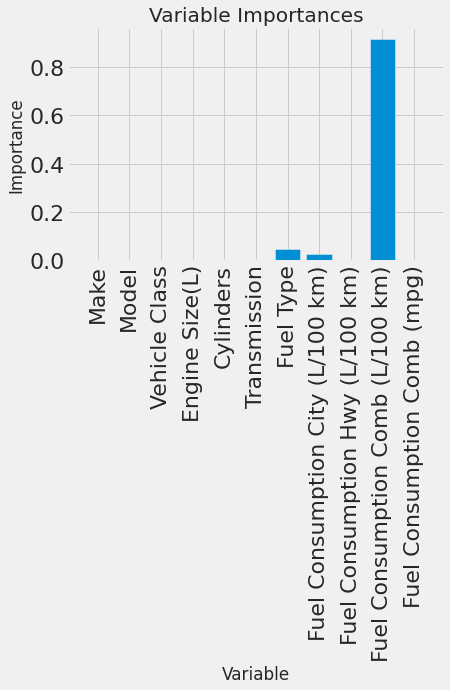

In [288]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Make
Feature: 0, Score: 0.00
Model
Feature: 1, Score: 0.00
Vehicle Class
Feature: 2, Score: 0.00
Engine Size(L)
Feature: 3, Score: 0.00
Cylinders
Feature: 4, Score: 0.00
Transmission
Feature: 5, Score: 0.00
Fuel Type
Feature: 6, Score: 0.05
Fuel Consumption City (L/100 km)
Feature: 7, Score: 0.03
Fuel Consumption Hwy (L/100 km)
Feature: 8, Score: 0.00
Fuel Consumption Comb (L/100 km)
Feature: 9, Score: 0.82
Fuel Consumption Comb (mpg)
Feature: 10, Score: 0.10


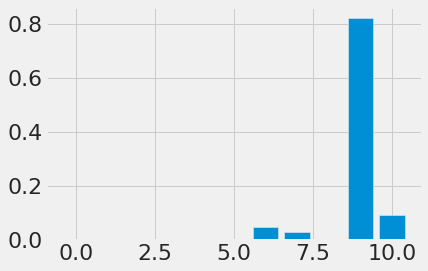

In [289]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, Y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  print(X.columns[i])
  print('Feature: %0d, Score: %.2f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#####Decision Tree for Important features

In [290]:
feature4 = dataset[['Fuel Consumption Comb (L/100 km)',
                    'Fuel Consumption Comb (mpg)','Fuel Type',
                    'Fuel Consumption City (L/100 km)','Engine Size(L)']]
label4 = dataset['CO2_emission']
feature4_train, feature4_test, label4_train, label4_test = train_test_split(feature4, label4, test_size=0.2, random_state =0)
scaler = StandardScaler()
feature4_train = scaler.fit_transform(feature4_train)
feature4_test = scaler.transform(feature4_test)
ds_model4 = DecisionTreeRegressor()
ds_model4.fit(feature4_train, label4_train)
y_predimp4 = ds_model4.predict(feature4_test)
y_predimp4
print('RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(label4_test,y_predimp4))))
print('MAE: {:0.2f}'.format(mean_absolute_error(label4_test,y_predimp4)))
print('R2_score: {:0.2f}'.format(r2_score(label4_test,y_predimp4)))

RMSE: 3.61
MAE: 1.83
R2_score: 1.00


#####Decision Tree Regresor using hyperperameter

In [291]:
# define a random state number for all random operations - ensures reproducibility of all results
random_state_num = 0

In [292]:
# choose features and label columns
feature_cols = ['Engine Size(L)','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
                    'Fuel Consumption Comb (mpg)', 'Cylinders']
label_col = ['CO2_emission']

# convert into nympy arrays (required for scikit-learn models)
features = np.array(dataset[feature_cols])
labels =  np.array(dataset[label_col])

In [293]:
# split into training and testing subsets
nr.seed(1)
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.1,
                                                                            random_state=random_state_num)

In [294]:
# Set folds for cross validation for the feature selection
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)

# Define the model
rf_selector = DecisionTreeRegressor(random_state=random_state_num) 

# Define an objects for a model for recursive feature elimination with CV
nr.seed(1)
selector = fs.RFECV(estimator = rf_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(features_train, np.ravel(labels_train))
selector.support_

print("Feature ranking after RFECV:")
print(selector.ranking_)

# print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(feature_cols,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[1 1 1 1 1 1]
Chosen important features:
['Engine Size(L)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'Cylinders']


In [295]:
# assign only the important variables to the features array of both training and testing dataset
features_train_reduced = selector.transform(features_train)
features_test_reduced = selector.transform(features_test)

print("Training subset shape before the recursive feature elimination:")
print(features_train.shape)
print("Training subset array shape after the recursive feature elimination:")
print(features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:")
print(features_test_reduced.shape)

Training subset shape before the recursive feature elimination:
(6646, 6)
Training subset array shape after the recursive feature elimination:
(6646, 6)
Test subset array shape after the recursive feature elimination:
(739, 6)


In [296]:
# Define value ranges for each hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

# Create the hyperparameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [297]:
# define the cross-validation folds for the hyperparameter tuning
nr.seed(1)
inside_folds = ms.KFold(n_splits=5, shuffle = True, random_state=random_state_num)

# Define the random forest regressor model object
rf_tuner = RandomForestRegressor(random_state=random_state_num)

# Perform a randomized search on the grid
nr.seed(1)
rf_model = ms.RandomizedSearchCV(estimator=rf_tuner, param_distributions = param_grid,
                                 random_state=random_state_num, refit=True,
                                 cv=inside_folds, scoring = 'r2', return_train_score=True, n_jobs=-1)

In [298]:
# Fit the grid search model object with cross-validation on the data
rf_model.fit(features_train_reduced, np.ravel(labels_train))

# Print the best parameter value
best_n_estimators = rf_model.best_estimator_.n_estimators
best_max_features = rf_model.best_estimator_.max_features
print("best number of estimators:")
print(best_n_estimators)
print("best max_features:")
print(best_max_features)
print("max_depth:")
print(rf_model.best_estimator_.max_depth)
print("min_samples_split")
print(rf_model.best_estimator_.min_samples_split)
print("min_samples_leaf")
print(rf_model.best_estimator_.min_samples_leaf)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


best number of estimators:
1600
best max_features:
sqrt
max_depth:
20
min_samples_split
2
min_samples_leaf
1


In [299]:
# pick the model with the best hyperparameter combination for further analysis
rf_best_model = rf_model.best_estimator_

In [300]:
# define the cross-validation folds for the evaluation
nr.seed(1)
outside_folds = ms.KFold(n_splits=10, shuffle = True, random_state=random_state_num)

# Evaluate the model on the training subset with cross-validation
nr.seed(1)
cv_eval = cross_val_score(rf_best_model, features_train_reduced, labels_train, cv = outside_folds, n_jobs=-1)

print('Mean R2 score of all CV folds = %4.3f' % np.mean(cv_eval))
print('Standard deviation of the R2 score over all folds = %4.3f' % np.std(cv_eval))
print('R2 score for each fold:')

# print the R2 score for each fold
for i, j in enumerate(cv_eval):
    print('Fold %2d    %4.3f' % (i+1, j))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Mean R2 score of all CV folds = 0.985
Standard deviation of the R2 score over all folds = 0.007
R2 score for each fold:
Fold  1    0.971
Fold  2    0.991
Fold  3    0.989
Fold  4    0.988
Fold  5    0.989
Fold  6    0.978
Fold  7    0.988
Fold  8    0.976
Fold  9    0.986
Fold 10    0.990


In [301]:
# make predictions from the features of the testing subset
predictions = rf_best_model.predict(features_test_reduced)

# import the functions for the metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

# calculate the metrics basing on the predicted and true values for the test subset
r2 = r2_score(y_true=labels_test, y_pred=predictions)
mse = mean_squared_error(y_true=labels_test, y_pred=predictions)
rmse = np.sqrt(mse)

print("R2= %4.2f"% r2)

print("Mean Squared Error: MSE= %4.2f"% mse)

print("Root Mean Squared Error: RMSE= %4.2f"% rmse)


R2= 0.99
Mean Squared Error: MSE= 26.58
Root Mean Squared Error: RMSE= 5.16


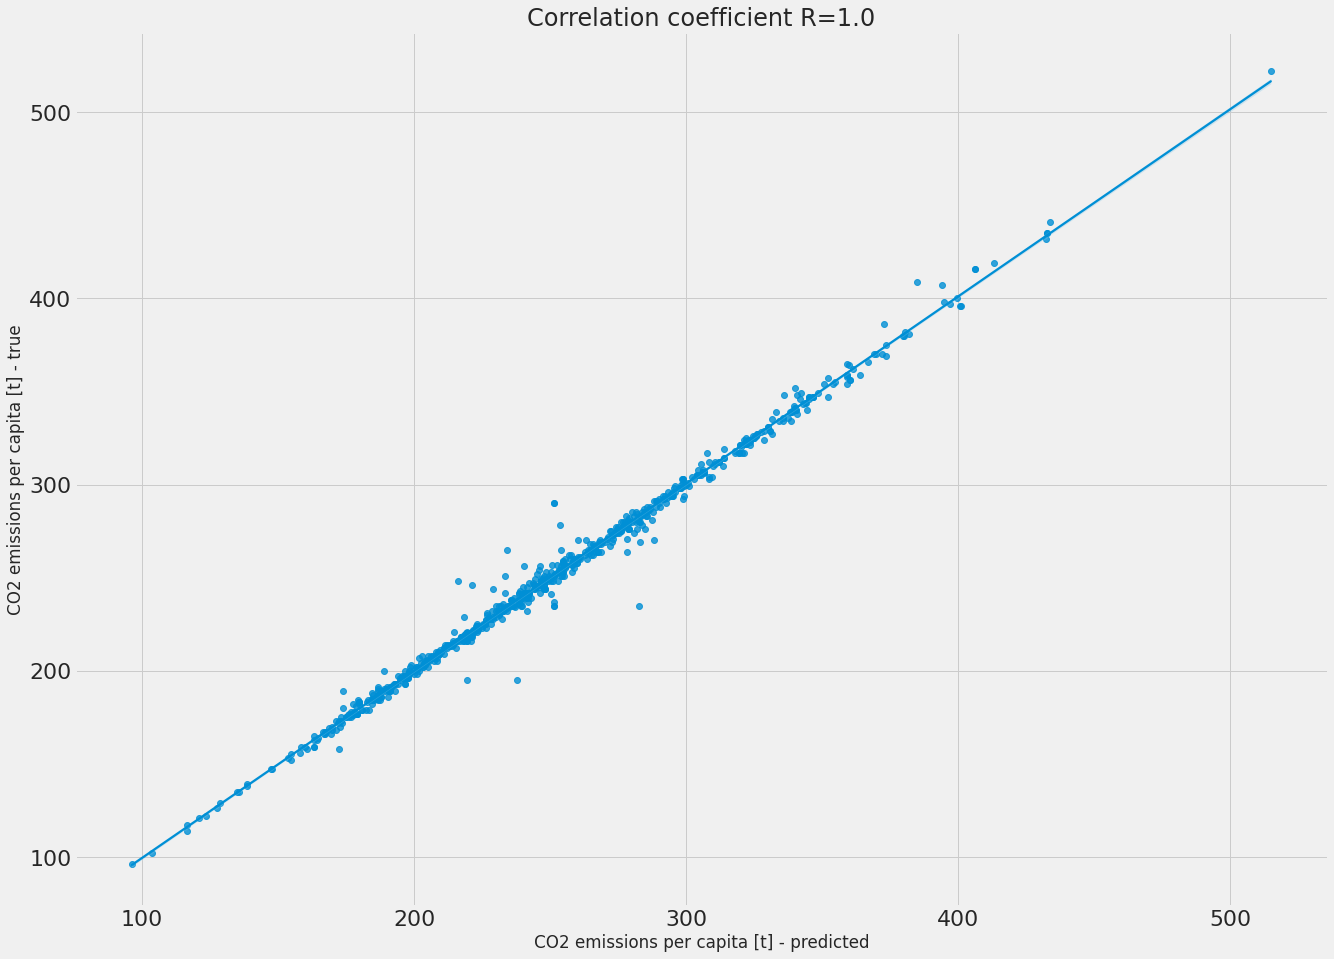

In [302]:
# plot predicted vs true values of the test subset

f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(labels_test)[0,:], fit_reg=True)
plt.xlabel("CO2 emissions per capita [t] - predicted")
plt.ylabel("CO2 emissions per capita [t] - true")
plt.title("Correlation coefficient R="+str(round(np.corrcoef(predictions,np.transpose(labels_test)[0,:])[0,1],2)))
plt.show()

###SVR

In [303]:
#SVR regression Model 
from sklearn.svm import LinearSVR
model = LinearSVR()
model.fit(X_train, Y_train)
y_svr_pred = model.predict(X_test)
print('RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(Y_test,y_svr_pred))))
print('MAE: {:0.2f}'.format(mean_absolute_error(Y_test,y_svr_pred)))
print('R2_score: {:0.2f}'.format(r2_score(Y_test,y_svr_pred)))

RMSE: 18.74
MAE: 7.71
R2_score: 0.90


In [304]:
frames = [y_svr_pred, Y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,241.227716,241.0
1,155.677766,229.0
2,252.637658,253.0
3,183.821480,183.0
4,231.042719,231.0


In [305]:
y_svr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_svr_pred['pred_values'] = (y_svr_pred['pred_values'].map(lambda x: round(x,2)))
y_svr_pred['diff'] = abs(y_svr_pred['real_values'] -y_svr_pred['pred_values'])
print('mean diff: ', round(abs(y_svr_pred['diff']).mean(),4))

mean diff:  7.7123


###Regression Comparison

In [306]:
#comparision of basic measures for different regression methods 
models =['LinReg','LasReg','RidReg','DT', 'RF',"SVR"]
frame = pd.DataFrame(columns={'models':[],'rmse_train':[], 'mae_train':[],'r2_train':[] ,'rmse_test':[], 'mae_test':[],'r2_test':[]})
for i in range(len(models)):
    if models[i] == 'LinReg':
        model = LinearRegression()
        model.fit(X_train,Y_train)
        pred_train = model.predict(X_train)
        rmse_train = format(np.sqrt(mean_squared_error(Y_train,pred_train)), '.2f')
        mae_train = format(mean_absolute_error(Y_train,pred_train), '.2f')
        r2_train = format(r2_score(Y_train,pred_train), '.2f')
        
        pred_test = model.predict(X_test)
        rmse_test = format(np.sqrt(mean_squared_error(Y_test,pred_test)), '.2f')
        mae_test = format(mean_absolute_error(Y_test,pred_test), '.2f')
        r2_test = format(r2_score(Y_test,pred_test), '.2f')
        frame.loc[frame.shape[0]] = ['Linear Regression', rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
    elif models[i] =='DT':
        model = DecisionTreeRegressor()
        model.fit(X_train,Y_train)
        pred_train = model.predict(X_train)
        rmse_train = format(np.sqrt(mean_squared_error(Y_train,pred_train)), '.2f')
        mae_train = format(mean_absolute_error(Y_train,pred_train), '.2f')
        r2_train = format(r2_score(Y_train,pred_train), '.2f')
        
        pred_test = model.predict(X_test)
        rmse_test = format(np.sqrt(mean_squared_error(Y_test,pred_test)), '.2f')
        mae_test = format(mean_absolute_error(Y_test,pred_test), '.2f')
        r2_test = format(r2_score(Y_test,pred_test), '.2f')
        frame.loc[frame.shape[0]] = ['Decision Tree Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='RF':
        model = RandomForestRegressor()
        model.fit(X_train,Y_train)
        pred_train = model.predict(X_train)
        rmse_train = format(np.sqrt(mean_squared_error(Y_train,pred_train)), '.2f')
        mae_train = format(mean_absolute_error(Y_train,pred_train), '.2f')
        r2_train = format(r2_score(Y_train,pred_train), '.2f')
       
        pred_test = model.predict(X_test)
        rmse_test = format(np.sqrt(mean_squared_error(Y_test,pred_test)), '.2f')
        mae_test = format(mean_absolute_error(Y_test,pred_test), '.2f')
        r2_test = format(r2_score(Y_test,pred_test), '.2f')
        frame.loc[frame.shape[0]] = ['Random Forest Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]    
        
    elif models[i] =='LasReg':
        model = Lasso(alpha=0.1)
        model.fit(X_train,Y_train)
        pred_train = model.predict(X_train)
        rmse_train = format(np.sqrt(mean_squared_error(Y_train,pred_train)), '.2f')
        mae_train = format(mean_absolute_error(Y_train,pred_train), '.2f')
        r2_train = format(r2_score(Y_train,pred_train), '.2f')
        
        pred_test = model.predict(X_test)
        rmse_test = format(np.sqrt(mean_squared_error(Y_test,pred_test)), '.2f')
        mae_test = format(mean_absolute_error(Y_test,pred_test), '.2f')
        r2_test = format(r2_score(Y_test,pred_test), '.2f')
        frame.loc[frame.shape[0]] = ['Lasso Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]

        
    elif models[i] =='RidReg':
        model = Ridge(alpha=0.1)
        model.fit(X_train,Y_train)
        pred_train = model.predict(X_train)
        rmse_train = format(np.sqrt(mean_squared_error(Y_train,pred_train)), '.2f')
        mae_train = format(mean_absolute_error(Y_train,pred_train), '.2f')
        r2_train = format(r2_score(Y_train,pred_train), '.2f')
        
        pred_test = model.predict(X_test)
        rmse_test = format(np.sqrt(mean_squared_error(Y_test,pred_test)), '.2f')
        mae_test = format(mean_absolute_error(Y_test,pred_test), '.2f')
        r2_test = format(r2_score(Y_test,pred_test), '.2f')
        frame.loc[frame.shape[0]] = ['Ridge Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    
        
    else :
        models[i] =='SVM'
        model = LinearSVR()
        model.fit(X_train,Y_train)
        pred_train = model.predict(X_train)
        rmse_train = format(np.sqrt(mean_squared_error(Y_train,pred_train)), '.2f')
        mae_train = format(mean_absolute_error(Y_train,pred_train), '.2f')
        r2_train = format(r2_score(Y_train,pred_train), '.2f')
        
        pred_test = model.predict(X_test)
        rmse_test = format(np.sqrt(mean_squared_error(Y_test,pred_test)), '.2f')
        mae_test = format(mean_absolute_error(Y_test,pred_test), '.2f')
        r2_test = format(r2_score(Y_test,pred_test), '.2f')
        frame.loc[frame.shape[0]] = ['Simple Vector Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]

In [307]:
frame

,models,rmse_train,mae_train,r2_train,rmse_test,mae_test,r2_test
0,Linear Regression,15.62,9.91,0.93,15.63,9.83,0.93
1,Lasso Regression,15.62,9.93,0.93,15.64,9.85,0.93
2,Ridge Regression,15.62,9.91,0.93,15.63,9.83,0.93
3,Decision Tree Regression,0.95,0.32,1.00,3.69,1.79,1.00
4,Random Forest Regression,1.32,0.78,1.00,4.64,1.89,0.99
5,Simple Vector Regression,19.38,7.91,0.89,18.77,7.71,0.90
